## Model

#### (1) SVM, 
#### (2) Naive Bayer, 
#### (3) XGBooster,
#### (4) Logistic, 
#### (5) Dicision Tree, 
#### (6) K-Nearest Neibor, 
#### (7) Random Forest

In [1]:
import pandas as pd
import numpy as np
# from surprise import Dataset, Reader, SVD
# from surprise.model_selection import train_test_split, cross_validate
# from surprise.accuracy import rmse
import matplotlib.pyplot as plt

In [18]:
review_sentiment_df = pd.read_csv('output/LSTM_predictions.csv')
review_sentiment_df

,Unnamed: 0,location_id,location_name,trip_type,rating,helpful_voting,review_text,actual_sentiment,predicted_sentiment,place_id,place_name,emotion
0,8,2273363.0,Wat Rajapradit Sathitmahasimaram Rajaworavihara,NONE,5.0,2.0,One of the least crowded temples but very beau...,2,2,P03013220,Bangkok,love
1,14,311043.0,Wat Phra Chetuphon,Couples,5.0,0.0,"The designs, the Buddhas, and other figures fe...",1,1,P03013220,Bangkok,surprise
2,17,317504.0,Temple Of Dawn (Wat Arun),Solo travel,5.0,15.0,"Known as Temple of Dawn, I went to this temple...",0,0,P03013220,Bangkok,joy
3,19,317504.0,Temple Of Dawn (Wat Arun),Family,4.0,0.0,I have to admit that this is a place i have al...,0,0,P03013220,Bangkok,sadness
4,23,456322.0,Wat Umong,Family,5.0,0.0,The visit to this temple was a good pick for u...,1,1,P03013220,Bangkok,joy
...,...,...,...,...,...,...,...,...,...,...,...,...
1163,5858,1390151.0,Herbal Steam House,Couples,3.0,0.0,Hubby and I stopped in for our third massage s...,0,0,P03015198,Samut Prakan,joy
1164,5866,6668995.0,Wat Intharam,Friends getaway,2.0,0.0,Wat Intharam was apparently built during the A...,1,1,P03015157,Samut Prakan,fear
1165,5880,456191.0,Khuean Srinagarindra National Park,Couples,4.0,1.0,After visiting the nearby waterfalls we drove ...,1,1,P03013837,Samut Prakan,joy
1166,5893,4322899.0,Prasat Wat Sa Kamphaeng Yai,Friends getaway,4.0,1.0,On same site as Prasat Wat Sa Kampheang Noi {w...,0,0,P03013503,Nonthaburi,joy


ValueError: 'o' is not a valid color value.

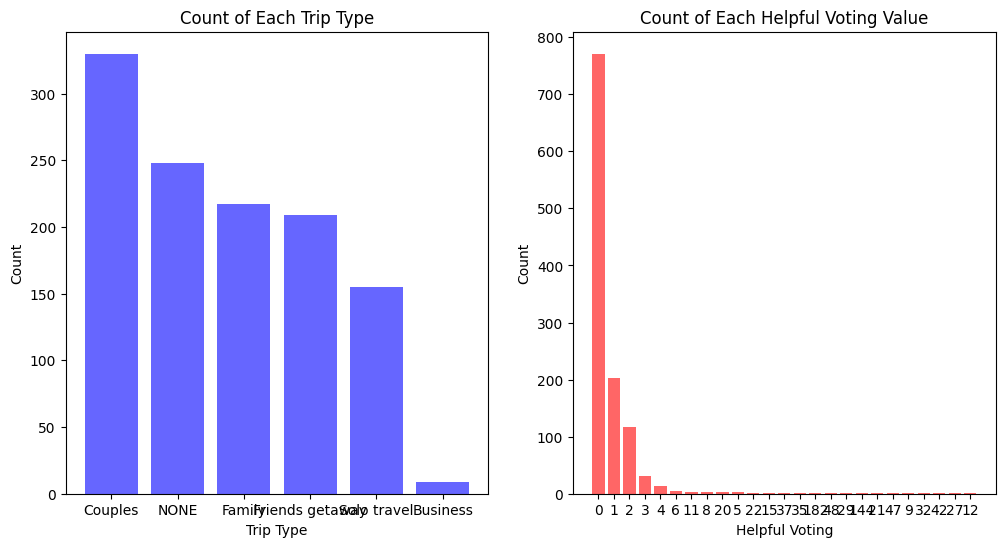

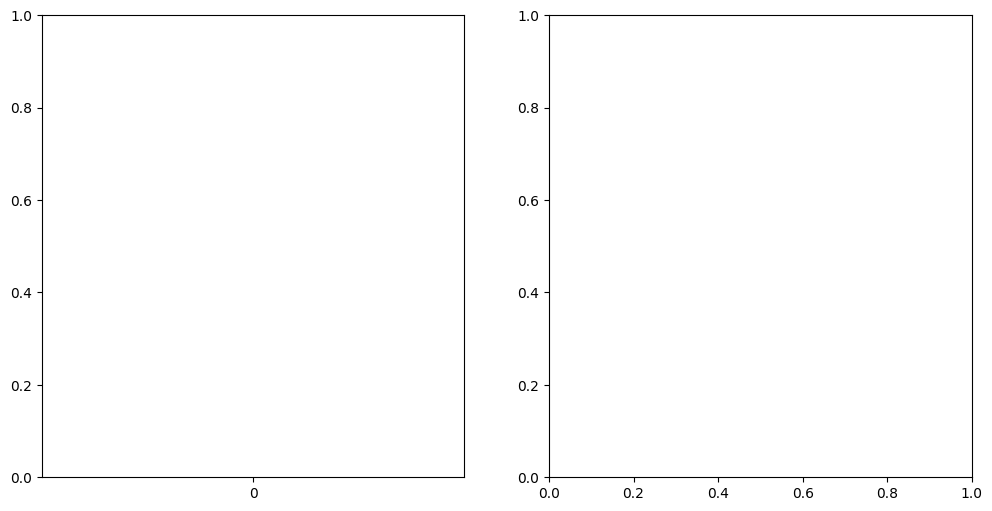

In [23]:
import matplotlib.pyplot as plt


trip_type_counts = review_sentiment_df['trip_type'].value_counts()

helpful_voting_counts = review_sentiment_df['helpful_voting'].astype(int).value_counts()

helpful_voting_counts = review_sentiment_df['helpful_voting'].astype(int).value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.bar(trip_type_counts.index.astype(str), trip_type_counts.values, color='b', alpha=0.6)
ax1.set_xlabel('Trip Type')
ax1.set_ylabel('Count')
ax1.set_title('Count of Each Trip Type')

ax2.bar(helpful_voting_counts.index.astype(str), helpful_voting_counts.values, color='r', alpha=0.6)
ax2.set_xlabel('Helpful Voting')
ax2.set_ylabel('Count')
ax2.set_title('Count of Each Helpful Voting Value')

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 6))
ax3.bar(helpful_voting_counts.index.astype(str), helpful_voting_counts.values, color='g', alpha=0.6)
ax3.set_xlabel('Helpful Voting')
ax2.set_ylabel('Count')
ax3.set_title('Count of Each Helpful Voting Value')

plt.tight_layout()

plt.show()


In [13]:
print(review_sentiment_df['trip_type'].values)

['NONE' 'Couples' 'Solo travel' ... 'Couples' 'Friends getaway'
 'Friends getaway']


In [25]:
review_sentiment_df[["predicted_sentiment", "helpful_voting", "rating", "location_name", "place_name"]]

,predicted_sentiment,helpful_voting,rating,location_name,place_name
0,2,2.0,5.0,Wat Rajapradit Sathitmahasimaram Rajaworavihara,Bangkok
1,1,0.0,5.0,Wat Phra Chetuphon,Bangkok
2,0,15.0,5.0,Temple Of Dawn (Wat Arun),Bangkok
3,0,0.0,4.0,Temple Of Dawn (Wat Arun),Bangkok
4,1,0.0,5.0,Wat Umong,Bangkok
...,...,...,...,...,...
1163,0,0.0,3.0,Herbal Steam House,Samut Prakan
1164,1,0.0,2.0,Wat Intharam,Samut Prakan
1165,1,1.0,4.0,Khuean Srinagarindra National Park,Samut Prakan
1166,0,1.0,4.0,Prasat Wat Sa Kamphaeng Yai,Nonthaburi


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [27]:
# Step 1: Create a proxy score based on a heuristic formula
review_sentiment_df['proxy_score'] = (0.5 * review_sentiment_df['rating']) + \
                                     (0.3 * review_sentiment_df['helpful_voting']) + \
                                     (0.2 * review_sentiment_df['predicted_sentiment'])

# Features and proxy score as target
X = review_sentiment_df[['rating', 'predicted_sentiment', 'helpful_voting']]
y = review_sentiment_df['proxy_score']

# Step 2: Split data into training (70%) and test sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize XGBoost regressor model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Step 4: Train the model using proxy scores
model.fit(X_train, y_train)

# Step 5: Predict on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on test set: {mse}')

# Step 7: Predict scores for the entire dataset
review_sentiment_df['predicted_score'] = model.predict(X)
print(review_sentiment_df[['location_name', 'place_name', 'predicted_score']])

Mean Squared Error on test set: 0.01511700164233075
                                        location_name    place_name  \
0     Wat Rajapradit Sathitmahasimaram Rajaworavihara       Bangkok   
1                                  Wat Phra Chetuphon       Bangkok   
2                           Temple Of Dawn (Wat Arun)       Bangkok   
3                           Temple Of Dawn (Wat Arun)       Bangkok   
4                                           Wat Umong       Bangkok   
...                                               ...           ...   
1163                               Herbal Steam House  Samut Prakan   
1164                                     Wat Intharam  Samut Prakan   
1165               Khuean Srinagarindra National Park  Samut Prakan   
1166                      Prasat Wat Sa Kamphaeng Yai    Nonthaburi   
1167                                  Prasat Puay Noi    Nonthaburi   

      predicted_score  
0            3.499465  
1            2.699694  
2            6.820713  

In [28]:
import plotly.express as px

In [29]:
# Create scatter plot using Plotly
fig = px.scatter(
    review_sentiment_df, 
    x='place_name', 
    y='predicted_score', 
    color='place_name',  # Optional: to color points by place_name
    hover_data=['location_name'],  # Display location_name when hovering
    title="Scatter Plot of Predicted Scores by Place Name"
)

# Show the plot
fig.show()

In [3]:
# ----------------------------
# 1. การเตรียมข้อมูล
# ----------------------------

# สมมติว่าเรามีข้อมูลดังนี้
data = {
    'tourist_id': [1, 2, 3, 4, 5],
    'place_id': [101, 102, 103, 104, 105],
    'score': [4, 5, 3, 4, 2],
    'sentiment': ['positive', 'positive', 'neutral', 'negative', 'positive']
}

df = pd.DataFrame(data)

# แปลง sentiment เป็นตัวเลข
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
df['sentiment_score'] = df['sentiment'].map(sentiment_mapping)

# คำนวณ rating
df['rating'] = (df['score'] * 20) + (df['sentiment_score'] * 10)
df['rating'] = df['rating'].clip(1, 100)  # เพื่อให้ค่าอยู่ระหว่าง 1-100

print("Data with calculated ratings:")
print(df[['tourist_id', 'place_id', 'score', 'sentiment', 'rating']])

Data with calculated ratings:
   tourist_id  place_id  score sentiment  rating
0           1       101      4  positive      90
1           2       102      5  positive     100
2           3       103      3   neutral      60
3           4       104      4  negative      70
4           5       105      2  positive      50


In [5]:
# ----------------------------
# 3. การแนะนำสถานที่สำหรับผู้ใช้
# ----------------------------

def get_recommendations(algo, user_id, df, num_recommendations=5):
    # ดึงรายการสถานที่ทั้งหมด
    all_places = df['place_id'].unique()
    
    # ดึงรายการสถานที่ที่ผู้ใช้ยังไม่เคยให้คะแนน
    user_places = df[df['tourist_id'] == user_id]['place_id']
    places_to_predict = np.setdiff1d(all_places, user_places)
    
    # ทำนาย rating สำหรับสถานที่ที่ยังไม่เคยให้คะแนน
    predictions = [algo.predict(user_id, place_id) for place_id in places_to_predict]
    
    # จัดเรียงตาม rating ที่ทำนายได้
    predictions.sort(key=lambda x: x.est, reverse=True)
    
    # เลือก top N recommendations
    top_predictions = predictions[:num_recommendations]
    
    # สร้าง DataFrame ผลลัพธ์
    recommendations = pd.DataFrame({
        'place_id': [pred.iid for pred in top_predictions],
        'estimated_rating': [pred.est for pred in top_predictions]
    })
    
    return recommendations


In [6]:
# ตัวอย่างการแนะนำสถานที่สำหรับผู้ใช้ที่มี tourist_id = 1
user_id = 1
recommendations = get_recommendations(algo, user_id, df, num_recommendations=3)

print(f"\nRecommendations for user {user_id}:")
print(recommendations)


Recommendations for user 1:
   place_id  estimated_rating
0       102         77.299194
1       104         76.175460
2       103         75.265293


In [7]:

# ----------------------------
# 4. การสร้าง Visualization สำหรับขั้นตอน Evaluate
# ----------------------------

# สร้าง DataFrame สำหรับการเปรียบเทียบค่าที่ทำนายกับค่าจริง
eval_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'r_ui', 'est', 'details'])
eval_df['error'] = eval_df['est'] - eval_df['r_ui']

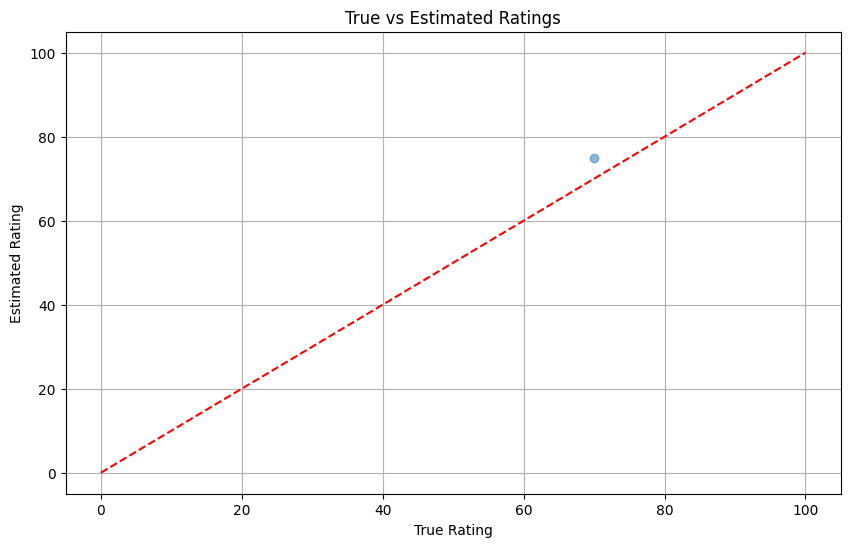

In [8]:
# สร้างแผนภูมิการกระจายของค่าที่ทำนายได้เทียบกับค่าจริง
plt.figure(figsize=(10, 6))
plt.scatter(eval_df['r_ui'], eval_df['est'], alpha=0.5)
plt.plot([0, 100], [0, 100], '--r')
plt.xlabel('True Rating')
plt.ylabel('Estimated Rating')
plt.title('True vs Estimated Ratings')
plt.grid(True)
plt.show()

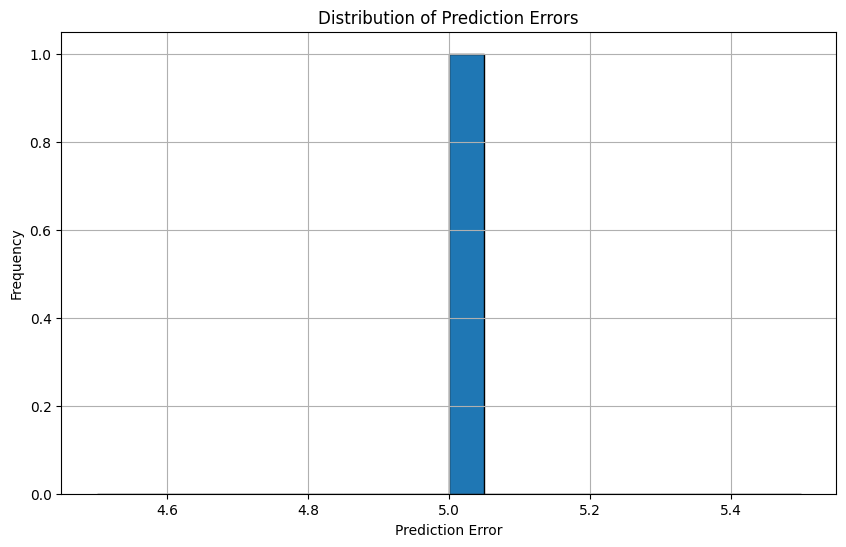

In [9]:
# สร้างแผนภูมิ histogram ของข้อผิดพลาด
plt.figure(figsize=(10, 6))
plt.hist(eval_df['error'], bins=20, edgecolor='k')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.grid(True)
plt.show()